In [1]:
import tensorflow
from tensorflow import keras as tf
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

[[  0   0   0   0   0   0   0   3   0  40  20   0   2   0   1   0  10  36   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   0 106  65   0   5   2   6   0  67 116   0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6   0  66 127   0   0   0   0   0 119  66   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  31 182 144  55  37  61 151 145   5   0   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0  40 186 189 193 188 193 196 171   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0  58 200 186 188 189 197 153 193  92   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 115 211 197 190 228 126  72 213 142   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 112 213 200 204 187  27 181 215 161   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  92 220 206 203 100 107 209 209 157   0   

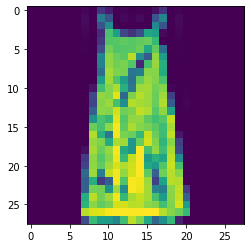

In [2]:
fmn = tf.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fmn.load_data()
np.set_printoptions(linewidth=200)
img = xtest[450]
print(img)
plt.imshow(img)

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtest = xtest.reshape(10000, 28, 28, 1)

In [5]:
model = tf.models.Sequential()

In [6]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [8]:
opt = tf.optimizers.Adadelta(learning_rate=0.01)
model.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [9]:
history = model.fit(xtrain, ytrain, epochs=15, validation_data=(xtest, ytest))

Epoch 1/15
1875/1875 [==============================] - 42s 22ms/step - loss: 5.0994 - accuracy: 0.5085 - val_loss: 0.9355 - val_accuracy: 0.7329
Epoch 2/15
1875/1875 [==============================] - 44s 23ms/step - loss: 1.0761 - accuracy: 0.6983 - val_loss: 0.6903 - val_accuracy: 0.7694
Epoch 3/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.7856 - accuracy: 0.7449 - val_loss: 0.5948 - val_accuracy: 0.7908
Epoch 4/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6708 - accuracy: 0.7730 - val_loss: 0.5459 - val_accuracy: 0.8064
Epoch 5/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6035 - accuracy: 0.7925 - val_loss: 0.5170 - val_accuracy: 0.8156
Epoch 6/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5655 - accuracy: 0.8030 - val_loss: 0.4943 - val_accuracy: 0.8243
Epoch 7/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5269 - accuracy: 0.8142 - val_loss: 0.4724 -

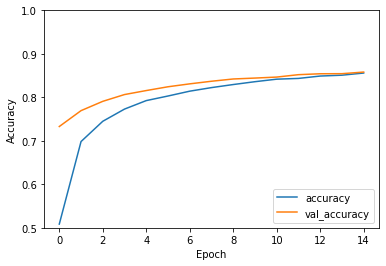

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
loss, acc = model.evaluate(xtest, ytest, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.858


In [13]:
pred = model.predict(xtest[450].reshape(1, 28, 28, 1))
print(pred)
print('Predicted: class=%d' % np.argmax(pred))

[[2.0599298e-03 1.9353004e-03 7.0358583e-05 9.9113983e-01 1.4905611e-04 3.4812292e-05 4.5715189e-03 6.5650426e-07 3.8056951e-05 4.2531698e-07]]
Predicted: class=3
